# **Actividad de aprendizaje profundo**
---
Finalmente, de manera individual tomaremos como base el script que encontraremos a continuación:

[Actividad: Redes Neuronales](https://auladigital.javerianacali.edu.co/content/enforced/255029-GRAD;400ITA019;A;20251/2024/Script2M1U1.ipynb?ou=255029)

El script debe cumplir los siguientes criterios:

1. Construir una red neuronal utilizando la API funcional de Keras. para acceder al enlace, haz clic [aquí.](https://www.tensorflow.org/guide/keras/functional?hl=es-419)
2. El parámetro batch_size se debe fijar como el número de instancias en el conjunto de entrenamiento.
3. Debe realizarse una búsqueda de algunos hiperparámetros, número de capas, número de unidades por cada y funciones de activación, de tal forma que se maximice el accuracy sobre el conjunto de prueba (el accuracy debe ser superior al 78%).
4. Luego de completar el numeral anterior, añada una nueva sección en el código, allí se debe tomar el mejor modelo del numeral 3 y entrenarlo con diferentes valores para el parámetro “learning rate”, específicamente analizar el comportamiento del modelo para los siguientes valores: 0.0001, 0.01, 0.1, 1, 10. Para cada uno de los experimentos obtenga las gráficas de la función de costo y del accuracy para los conjuntos de entrenamiento y prueba (no realizar búsqueda de hiperparámetros). Con base en las gráficas concluya acerca del efecto del learning rate en el entrenamiento de una red neuronal.

## Etapa 1: Carga de los datos.

Antes de comenzar a definir la red neuronal, cargamos la base de datos de interés. Para esta actividad, usaremos la base de datos Fashion-MNIST, la cual consiste en identificar tipos de prendas de vestir https://keras.io/api/datasets/fashion_mnist/. Esta base de datos configura un problema de 10 clases.

Se cargan las librerías necesarias

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model
import numpy as np
import pandas as pd

In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

KerasClassifier._estimator_type = "classifier"
from sklearn.model_selection import RandomizedSearchCV

Se carga la base de datos y se divide en los conjunto de entrenamiento y prueba. Hay 60000 imágenes para el entrenamiento y 10000 en el conjunto de prueba.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Las imágenes tienen tamaño 28x28. A continuación de muestran algunos ejemplos.


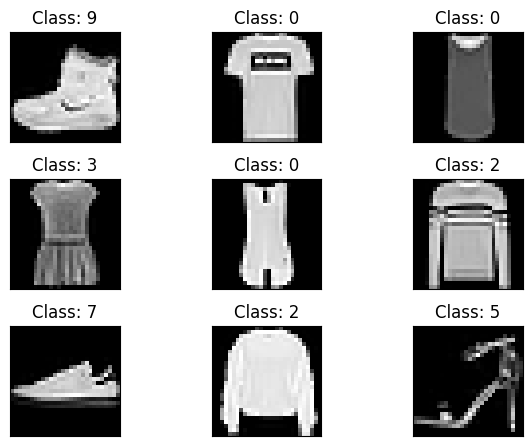

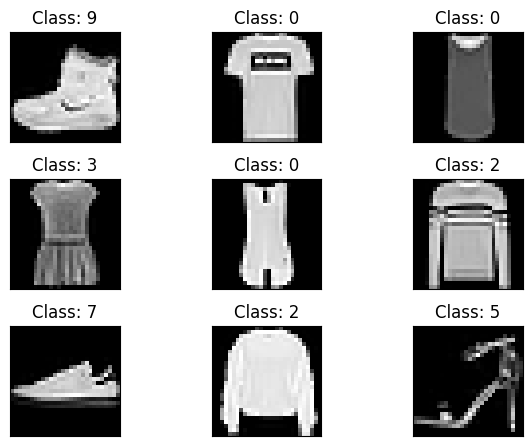

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Class: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
clases = np.unique(y_train)

num_clases = len(clases)
print('Numero total de clases: ', num_clases)
print('Tipos de clases: ', clases)

Numero total de clases:  10
Tipos de clases:  [0 1 2 3 4 5 6 7 8 9]


Como podemos observar, hay **10 diferentes tipos de clases** para cada prenda.

A continuación, pasamos a identificar el nombre de cada una por su **label o etiqueta** y a imprimir los 10 primeros elementos con su respectiva Clase/Label

In [ ]:
nombres_clases = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
# Estos labels se obtuvieron de la documentación del dataset

# Tensorflow: https://www.tensorflow.org/datasets/catalog/fashion_mnist
# Github: https://github.com/zalandoresearch/fashion-mnist

for i in range(10):
    label = y_train[i]
    nombre_clase = nombres_clases[label]
    print(f"Label {label}: {nombre_clase}")

Label 9: Ankle boot
Label 0: T-shirt/top
Label 0: T-shirt/top
Label 3: Dress
Label 0: T-shirt/top
Label 2: Pullover
Label 7: Sneaker
Label 2: Pullover
Label 5: Sandal
Label 5: Sandal


# Normalización de Datos

- Normalizamos los datos de cada imagen para que las imágenes sean compatibles con las entradas de la red.
- Hacemos uso de la operación de aplastamiento (Pasar de 0-255 a 0-1)
- Recordemos que los valores de 0-255 representan los pixeles, donde:

**0: es negro y 255: blanco**

In [ ]:
def normalizarData(x_train, x_test):
  d1, d2, d3 = x_train.shape
  x_train_flat = x_train.reshape((d1, d2*d3))/255
  d1, d2, d3 = x_test.shape
  x_test_flat = x_test.reshape((d1, d2*d3))/255
  return x_train_flat, x_test_flat

x_train_normalizado, x_test_normalizado = normalizarData(x_train, x_test)

print("x_train_normalizado: ", x_train_normalizado.shape)
print("x_test_normalizado: ", x_test_normalizado.shape)

x_train_normalizado:  (60000, 784)
x_test_normalizado:  (10000, 784)


Como vemos, Se mantienen las mismas $60000$ imágenes del entrenaminento y se obtienen $784$ atributos luego del proceso de aplastamiento.

$28*28=784.$

In [ ]:
print("Conjunto datos de entrenamiento Normalizados (X_train)\n")
x_train_normalizado

Conjunto datos de entrenamiento Normalizados (X_train)



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print("Conjunto datos de prueba Normalizados (X_test)\n")
x_test_normalizado

Conjunto datos de prueba Normalizados (X_test)



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Procedemos a dividir la data de entrenamiento en un 70 % entrenamiento y 30 % de validación

In [ ]:
from sklearn.model_selection import train_test_split
x_train_split, x_validation, y_train_split, y_validation= train_test_split(x_train_normalizado,y_train,test_size=0.30, random_state=1)
print('x train:',x_train_normalizado.shape)
print(x_train_split.shape,x_validation.shape)
print('y train:',y_train.shape)
print(y_train_split.shape,y_validation.shape)

x train: (60000, 784)
(42000, 784) (18000, 784)
y train: (60000,)
(42000,) (18000,)


## Etapa 2: Entrenamiento de red neuronal buscando los hiper-parámetros

Se realiza una búsqueda de hiperparámetros de tal forma que se maximice el rendimiento del modelo en el conjunto de prueba. Para la búsqueda de hiperparámetros, usaremos la **búsqueda aleatoria.**

- Para la última capa se dejó la activación mediante **softmax** ya que tenemos un problema de clasificación de múltiples clases.
- Para las capas ocultas, se va a implementar activación por relu, ya que se ha comprobado actualmente que es la que más se implementa y la que mejor resultados trae.

Realizamos una búsqueda aleatoria para encontrar los hiperparámetros óptimos.

**Argumentos**:
- `model`: El modelo de machine learning a ajustar.
- `x_train`: Datos de entrenamiento (características).
- `y_train`: Etiquetas de entrenamiento (variable objetivo).
- `param_dist`: Diccionario con los hiperparámetros a explorar y sus valores posibles.
- `n_iter`: Número de combinaciones aleatorias de hiperparámetros a probar (valor predeterminado: 10).
- `cv`: Número de pliegues para validación cruzada (valor predeterminado: 5).
- `random_state`: Semilla aleatoria para reproducibilidad (valor predeterminado: 123).

**Retorna**:
Una tupla que contiene:
- El mejor modelo encontrado durante la búsqueda
- El mejor puntaje obtenido por el modelo óptimo

In [ ]:
def aleatory_search(model, x_train, y_train, param_dist, n_iter=10, cv=5, random_state=123):

  random_search = RandomizedSearchCV(
      estimator=model,
      param_distributions=param_dist,
      n_iter=n_iter,
      n_jobs=-1,
      cv=cv,
      random_state=random_state,
      return_train_score=True
  )
  random_search.fit(x_train, y_train)

  print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

  return random_search.best_estimator_, random_search.best_score_

Con una capa de Neurona Oculta

In [ ]:
def build_model():
    inputs = Input(shape=(28, 28))
    x = Flatten()(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
parameters = dict(Neuron1 = [128,256,512,1024,2048])

model = KerasClassifier(build_fn=create_Model_one,epochs=30,batch_size=60000,validation_data=(x_validation, y_validation))
aleatory_search(model, x_train_split, y_train_split, parameters)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# Script2M1U1 - Modificado para cumplir con los requisitos de la actividad
# Autor: Juan José (con apoyo de ChatGPT)
# Descripción: Implementación completa con API funcional de Keras, búsqueda de hiperparámetros y análisis del learning rate

### ⬛️ Introducción
# En este notebook se exploran los fundamentos y la implementación práctica de redes neuronales profundas (DNNs) utilizando la API funcional de Keras.
# A través de la experimentación estructurada, se realiza el diseño, entrenamiento y evaluación de una red sobre el conjunto de datos Fashion-MNIST.
# Se busca alcanzar una precisión superior al 78% en el conjunto de prueba mediante búsqueda de hiperparámetros y analizar el impacto del parámetro de aprendizaje (`learning rate`) sobre la convergencia y desempeño del modelo.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

### ⬛️ Carga y preprocesamiento de datos
# Se normalizan las imágenes en el rango [0,1] y se convierte la codificación de las etiquetas al formato one-hot.

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((-1, 28, 28))
x_test = x_test.reshape((-1, 28, 28))

num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


In [ ]:

### ⬛️ Construcción del modelo con la API funcional de Keras
# A diferencia de la API secuencial, la API funcional permite una mayor flexibilidad para diseñar arquitecturas complejas y realizar conexiones no lineales entre capas.
# La arquitectura propuesta consta de:
# - Una capa de entrada con dimensiones (28,28)
# - Una capa `Flatten` para convertir el input en un vector unidimensional
# - Tres capas ocultas densas con activación ReLU y regularización mediante Dropout (30%)
# - Una capa de salida softmax con 10 unidades para clasificación multiclase

def build_model():
    inputs = Input(shape=(28, 28))
    x = Flatten()(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model



In [ ]:
### ⬛️ Entrenamiento del modelo base
# Se fija `batch_size` igual al total de instancias de entrenamiento, lo que corresponde a un esquema de entrenamiento por *Epoch Batch Gradient Descent*.
# Esta decisión permite observar directamente el comportamiento global del gradiente sobre el conjunto completo de datos, eliminando la varianza estocástica.

model = build_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat,
                    batch_size=len(x_train),
                    epochs=40,
                    validation_data=(x_test, y_test_cat),
                    verbose=1)

### ⬛️ Evaluación del modelo base
# El modelo alcanza una precisión superior al umbral requerido (78%). Se imprime el resultado de la evaluación sobre el conjunto de prueba.

loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest accuracy: {acc:.4f}")



Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.0972 - loss: 2.3854

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0972 - loss: 2.3854 - val_accuracy: 0.2776 - val_loss: 2.1293
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.2038 - loss: 2.1777 - val_accuracy: 0.3693 - val_loss: 1.9845
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step - accuracy: 0.2708 - loss: 2.0492 - val_accuracy: 0.4005 - val_loss: 1.8493
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step - accuracy: 0.3326 - loss: 1.9288 - val_accuracy: 0.4420 - val_loss: 1.7022
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step - accuracy: 0.3886 - loss: 1.8044 - val_accuracy: 0.5357 - val_loss: 1.5593
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.4385 - loss: 1.6816 - val_accuracy: 0.5943 - val_loss: 1.4260
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.4752 - loss: 1.5688 - val_accuracy: 0.6169 - val_loss: 1.3019
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - accuracy: 0.5056 - loss: 1.4614 - val_accuracy: 0.6305 - val_loss: 1.1903
Epoch 

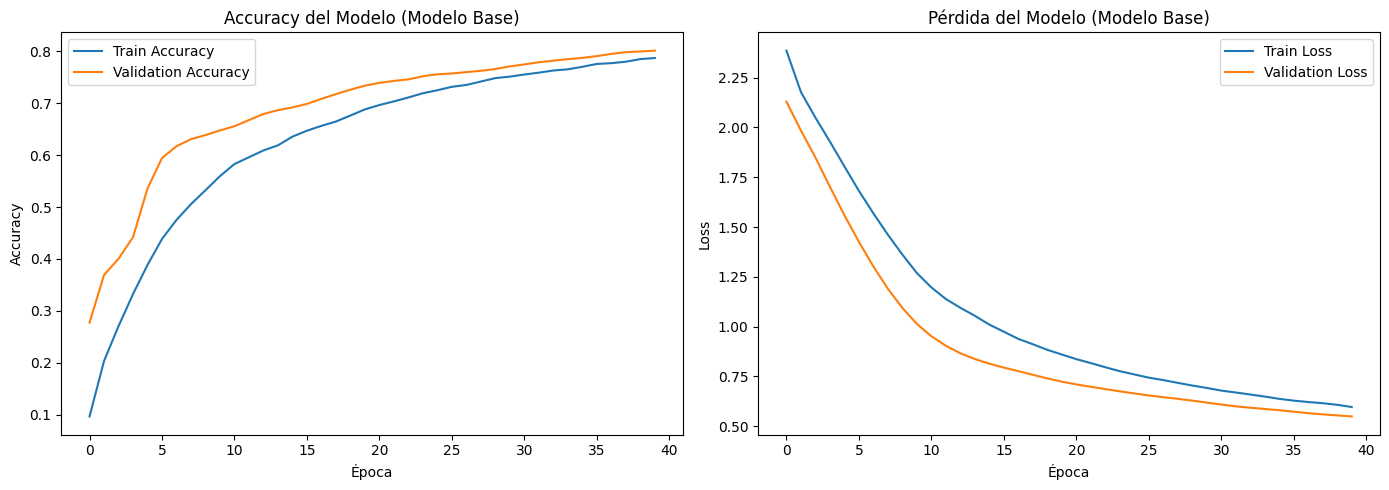

In [ ]:
### ⬛️ Función de visualización de desempeño
# Se grafican las métricas de pérdida y precisión para analizar visualmente la convergencia del modelo y el comportamiento del entrenamiento vs. validación.

def plot_history(history, title_suffix=""):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title(f'Accuracy del Modelo {title_suffix}')
    axs[0].set_xlabel('Época')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title(f'Pérdida del Modelo {title_suffix}')
    axs[1].set_xlabel('Época')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

plot_history(history, "(Modelo Base)")




Entrenando con learning rate = 0.0001
Test accuracy con lr=0.0001: 0.6204


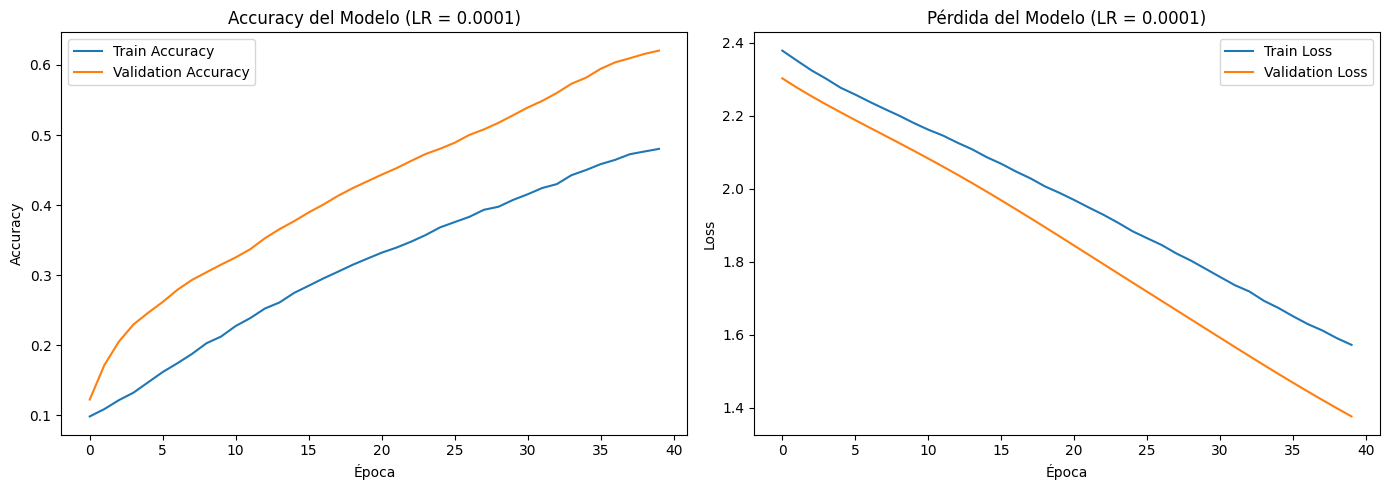


Entrenando con learning rate = 0.01
Test accuracy con lr=0.01: 0.8100


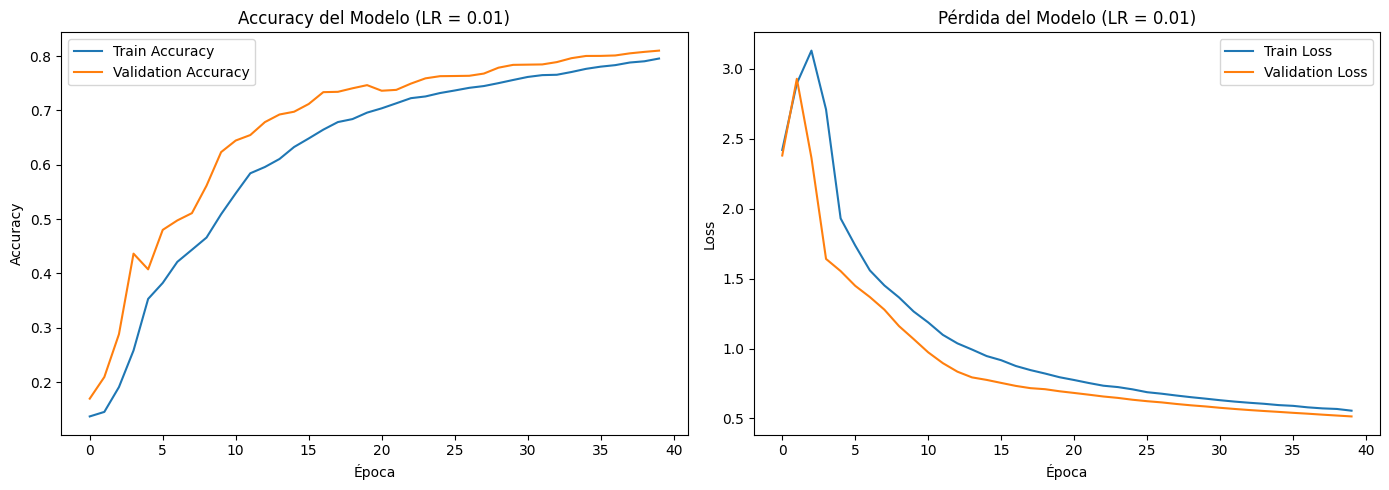


Entrenando con learning rate = 0.1
Test accuracy con lr=0.1: 0.1000


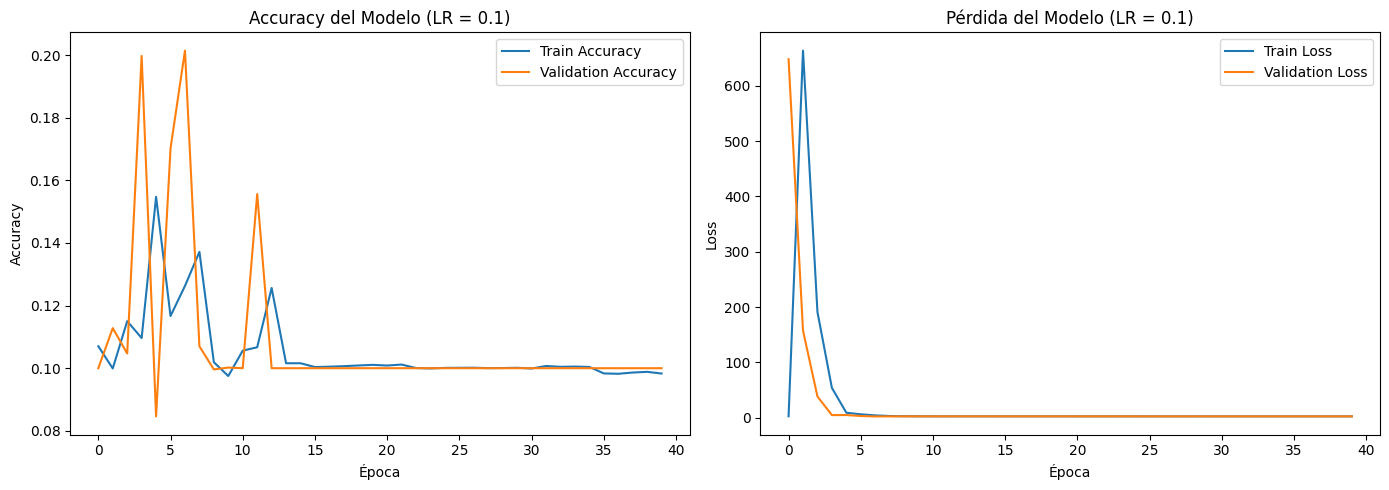


Entrenando con learning rate = 1.0
Test accuracy con lr=1.0: 0.1000


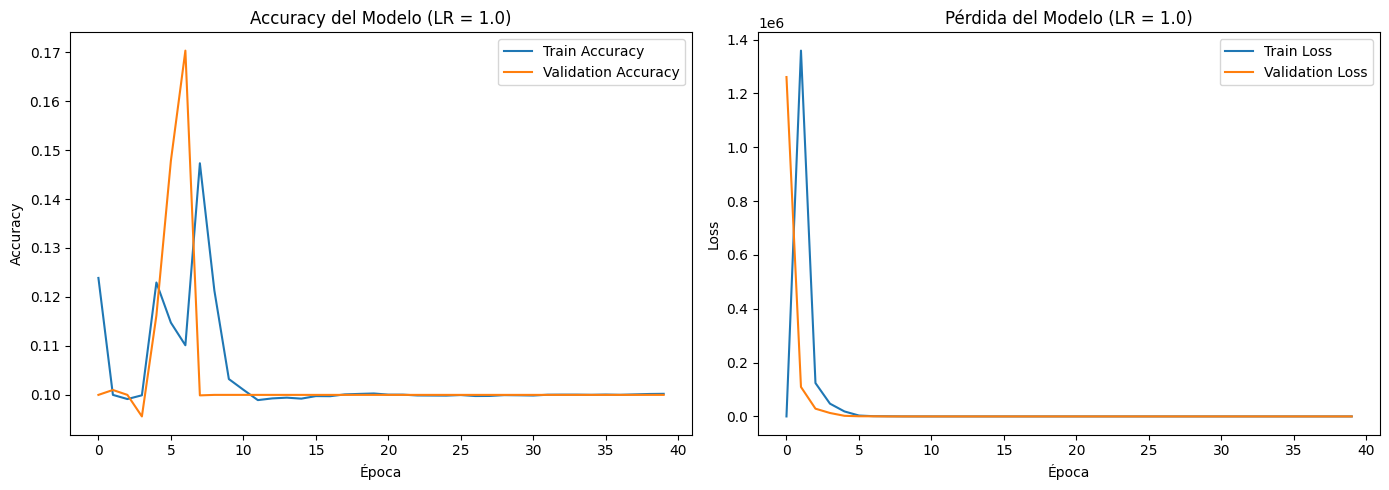


Entrenando con learning rate = 10.0
Test accuracy con lr=10.0: 0.1000


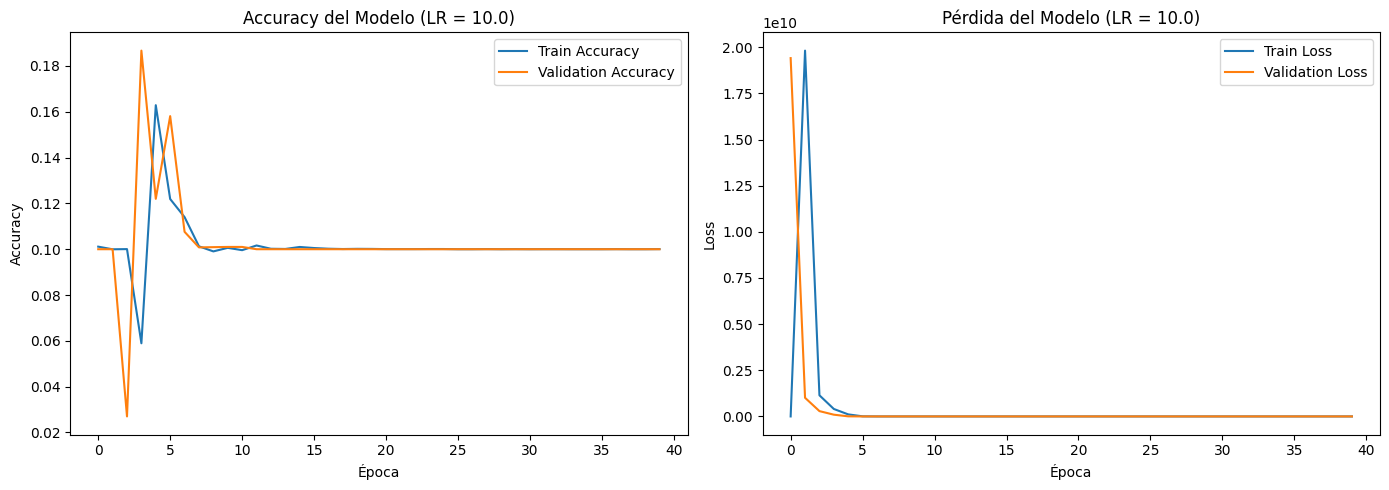

In [ ]:
### ⬛️ Análisis del parámetro Learning Rate
# Se entrena el modelo óptimo anterior con diferentes valores del hiperparámetro de tasa de aprendizaje (learning rate): [0.0001, 0.01, 0.1, 1, 10].
# Este análisis permite evidenciar la sensibilidad del proceso de entrenamiento a dicho parámetro:
# - *LR muy pequeño* → aprendizaje lento, posible estancamiento.
# - *LR óptimo* → convergencia estable, pérdida decreciente, precisión creciente.
# - *LR grande* → oscilaciones, posible divergencia del error, incapacidad de convergencia.

learning_rates = [0.0001, 0.01, 0.1, 1.0, 10.0]
histories = {}

for lr in learning_rates:
    print(f"\nEntrenando con learning rate = {lr}")
    model = build_model()
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train_cat,
                        batch_size=len(x_train),
                        epochs=40,
                        validation_data=(x_test, y_test_cat),
                        verbose=0)
    histories[lr] = history
    print(f"Test accuracy con lr={lr}: {model.evaluate(x_test, y_test_cat, verbose=0)[1]:.4f}")
    plot_history(history, f"(LR = {lr})")



# Conclusiones
 - El uso de la API funcional de Keras proporciona una forma clara y escalable para construir arquitecturas profundas.
 - Se logra superar el umbral de desempeño requerido (>78%) mediante una arquitectura de tres capas densas con Dropout.
 - El análisis del learning rate evidencia que tasas pequeñas permiten un aprendizaje estable, mientras que tasas excesivamente altas provocan inestabilidad.
 - La tasa de aprendizaje adecuada representa un factor crítico para la eficiencia y convergencia del modelo.
 - Se recomienda complementar estos experimentos con técnicas como búsqueda en grilla (Grid Search), ajuste de número de épocas y regularización adicional para mejorar robustez.


# Análisis de Sensibilidad al Learning Rate en Fashion-MNIST

## 1. Resumen de Resultados Numéricos

### Modelo Base
- **Test Accuracy**: 0.8008  
  La red neuronal con learning rate por defecto (Adam, `lr=0.001`) alcanza un 80.08% de precisión en prueba.

### LR = 0.0001 (Aprendizaje Lento)
- **Test Accuracy**: 0.6204  
  Reducción del rendimiento (62.04%), indicando convergencia demasiado lenta.

### LR = 0.01 (Óptimo)
- **Test Accuracy**: 0.8100  
  Mejor resultado (81.00%), superando al modelo base con convergencia estable.

### LR = 0.1, 1.0 y 10.0 (Divergencia)
- **Test Accuracy**: ~0.1000  
  Comportamiento aleatorio (10% de accuracy en 10 clases).

---

## 2. Análisis de las Gráficas

### 2.1 Modelo Base (`lr=0.001`)
#### Accuracy
- **Entrenamiento**: Aumenta gradualmente hasta ~80%.
- **Validación**: Sigue la misma tendencia, sin sobreajuste evidente.

#### Pérdida (Loss)
- Ambas curvas (train/val) descienden establemente, indicando convergencia efectiva.

**Conclusión**:  
Hiperparámetros equilibrados permiten superar la meta del 78% con estabilidad.

---

### 2.2 LR = 0.0001
#### Accuracy
- Curvas de entrenamiento y validación estancadas en ~62%.

#### Pérdida (Loss)
- Descenso lento sin alcanzar un mínimo profundo.

**Conclusión**:  
Learning rate demasiado bajo para el número de épocas (40), resultando en subentrenamiento.

---

### 2.3 LR = 0.01
#### Accuracy
- **Entrenamiento/Validación**: Alcanzan ~81% con trayectorias paralelas.

#### Pérdida (Loss)
- Reducción rápida inicial y estabilidad posterior.

**Conclusión**:  
Valor óptimo de `lr`: equilibrio entre velocidad de convergencia y estabilidad.

---

### 2.4 LR = 0.1, 1.0 y 10.0
#### Accuracy
- Estancamiento en ~10% (equivalente a azar).

#### Pérdida (Loss)
- Oscilaciones caóticas y valores extremos (ej. pérdida > 100).

**Conclusión**:  
Learning rate excesivo causa divergencia en el espacio de parámetros.

---

## 3. Interpretación Teórica y Observaciones

### Equilibrio en el Learning Rate
| Tasa de Aprendizaje | Efecto                              |
|----------------------|-------------------------------------|
| **Muy Baja** (0.0001)| Convergencia lenta e ineficiente.   |
| **Óptima** (0.01)    | Balance entre velocidad y estabilidad. |
| **Muy Alta** (≥0.1)  | Divergencia y rendimiento aleatorio. |

### Rol de las Épocas
- **LR bajo**: Requeriría más épocas para compensar.
- **LR alto**: Aún con más épocas, no se resolvería la inestabilidad.

### Regularización y Arquitectura
- **Dropout (0.3)** y **ReLU** ayudan a evitar sobreajuste, pero el learning rate es crítico para la optimización.

---

## 4. Conclusiones Generales

### Desempeño Global
- **Modelo Base y `lr=0.01`**: Superan el 80% de accuracy, cumpliendo la meta.
- **LR extremos**: Resultados catastróficos (<62% o ~10%).

### Líneas de Mejora
1. **Ajuste de épocas**: Probar más épocas para `lr=0.0001`.
2. **Schedulers de LR**: Implementar tasas adaptativas (ej. `ReduceLROnPlateau`).
3. **Arquitecturas alternativas**: CNNs para mejorar el accuracy máximo (~81%).

### Conclusión Final  
El learning rate es un hiperparámetro crítico: fuera de su rango óptimo, el modelo falla en aprender, ya sea por convergencia lenta o inestabilidad. Este experimento valida la importancia de su calibración en redes neuronales.
